In [8]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
#tree

In [10]:
df = pd.read_csv('merged_data.csv')
df

,Date,Count_crimes,Violent_crime,Is_holiday,Is_full_moon,tempmax,tempmin,temp,feelslikemax,feelslikemin,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,Year,Month,YrMon,Rate
0,2010-01-01,74,25,1,0,-8.3,-14.5,-11.7,-15.0,-22.4,...,38.3,15.1,76.1,6.6,3,0.53,2010,1,2010.041667,0.337838
1,2010-01-02,51,10,0,0,-11.4,-16.4,-14.1,-18.4,-25.3,...,24.3,15.8,97.6,8.5,4,0.57,2010,1,2010.041667,0.196078
2,2010-01-03,44,15,0,0,-7.9,-17.5,-12.5,-14.7,-25.6,...,52.2,15.6,88.0,7.6,4,0.60,2010,1,2010.041667,0.340909
3,2010-01-04,52,14,0,0,-7.4,-13.1,-10.2,-14.4,-21.3,...,92.6,15.7,44.0,3.5,2,0.64,2010,1,2010.041667,0.269231
4,2010-01-05,52,11,0,0,-5.1,-9.5,-7.9,-11.7,-15.9,...,91.8,15.4,67.5,5.8,3,0.67,2010,1,2010.041667,0.211538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5163,2024-02-20,42,16,0,0,14.2,-0.7,6.9,14.2,-3.1,...,16.5,15.9,128.0,11.1,6,0.37,2024,2,2024.125000,0.380952
5164,2024-02-21,35,14,0,0,18.5,7.8,12.3,18.5,5.0,...,83.8,16.0,84.1,7.3,5,0.40,2024,2,2024.125000,0.400000
5165,2024-02-22,33,8,0,0,15.5,8.4,10.9,15.5,6.8,...,68.1,16.0,106.0,9.2,5,0.44,2024,2,2024.125000,0.242424
5166,2024-02-23,28,7,0,0,10.6,-1.8,4.9,10.6,-9.2,...,47.7,13.1,83.8,7.2,6,0.47,2024,2,2024.125000,0.250000


In [11]:
data_train = df
categorical_features = ['Date', 'Year', 'Month', 'Count_crimes','Violent_crime','YrMon']

# Generate numeric features excluding categorical and high cardinality features, price, and Id
numeric_features = [col for col in data_train.columns 
                    if col not in categorical_features 
                    and col not in ['Rate']]

# Select features and target variable
selected_features = numeric_features
X = data_train[selected_features]
y = data_train['Rate']

In [12]:
rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)

# Fit the model
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Map feature names to their respective importances
feature_importance_map = dict(zip(X.columns, feature_importances))

# Sort the features by importance
sorted_features = sorted(feature_importance_map.items(), key=lambda x: x[1], reverse=True)

# Extract top 10 features
top_features = sorted_features[:20]

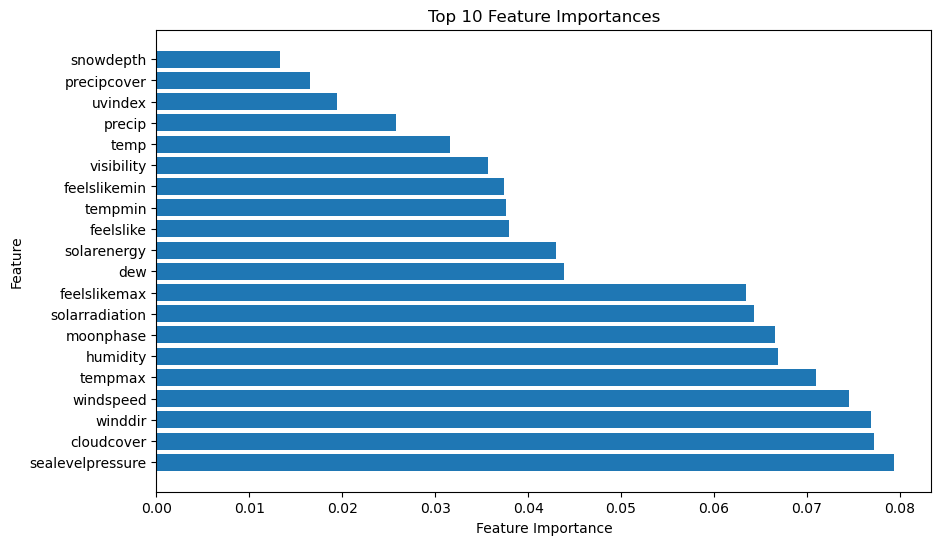

In [13]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features)), [val[1] for val in top_features], align='center')
plt.yticks(range(len(top_features)), [val[0] for val in top_features])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.show()

In [14]:
top_feature_names = [feature[0] for feature in top_features]
top_feature_names

['sealevelpressure',
 'cloudcover',
 'winddir',
 'windspeed',
 'tempmax',
 'humidity',
 'moonphase',
 'solarradiation',
 'feelslikemax',
 'dew',
 'solarenergy',
 'feelslike',
 'tempmin',
 'feelslikemin',
 'visibility',
 'temp',
 'precip',
 'uvindex',
 'precipcover',
 'snowdepth']